# Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Ingestion

In [2]:
df=pd.read_csv(r'C:\Users\PS4Z\Downloads\archive\income_evaluation.csv')

In [3]:
#seeing how the looks like
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Understanding data

In [4]:
#seeing the shape of data
print('Data Shape: ',df.shape)

Data Shape:  (32561, 15)


In [5]:
#understanding about null values in data
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [6]:
#Getting information about data; null counts and data types of data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Observations:There are total 32537 rows and 15 columns in the dataset
Categorical features = 9 and Numerical features = 6

In [7]:
#list od column names
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [8]:
#getting rid of all spaces in the column names
df.columns= df.columns.str.strip()

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
#getting data types of each column header
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [11]:
#getting a closer look on our targe variable
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

Observation:Most employees fall in <=50K income category

In [12]:
#classifying our target variable in binary notations for ease of understanding
df['income']=df['income'].map({' <=50K':0, ' >50K':1})

In [13]:
#seeing the data type of target variable change from object to int
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [14]:
#duplicate entries in data
df.duplicated().sum()

24

In [15]:
#dropping all duplicate entries
df.drop_duplicates(inplace=True)

In [16]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [17]:
#getting value counts for workclass column
df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [18]:
#getting value counts for native-country column
df['native-country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
#getting value counts for occupation column
df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

Observation:workclass, occupation and native_country has missing values

# Understanding Imbalanced Data

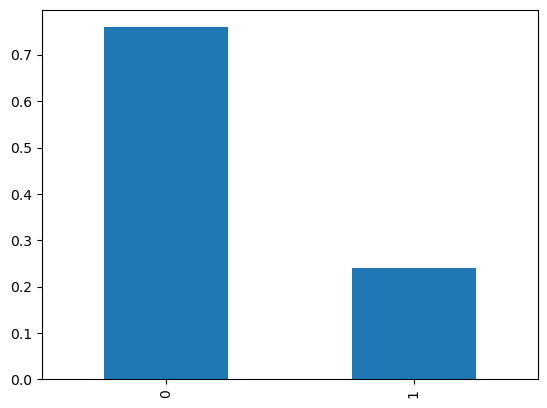

In [20]:
#Plotting Bar Plot for target variable
df['income'].value_counts(normalize=True).plot(kind='bar');

Observation:we can see above data is imbalanced, more class belongs to less than or equal to 50k

In [21]:
#getting a sample from data
df.sample(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
15765,29,Private,94892,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
29330,37,Private,212437,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,0,48,United-States,0
19533,26,Private,86483,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,0
20227,40,?,65545,Masters,14,Divorced,?,Own-child,White,Female,0,0,55,United-States,0
14230,62,Local-gov,33365,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,40,Canada,0
13385,54,Self-emp-inc,383365,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,70,United-States,1
20389,50,Self-emp-not-inc,30731,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Male,0,0,50,United-States,0


In [22]:
#Getting 5 point summary for all numercial features
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


# Separating numerical features from categorical features

In [23]:
#categorizing numericl and categorical features based on the data type
num_feat=[i for i in df.columns if df[i].dtypes!='O']
cat_feat=[j for j in df.columns if df[j].dtypes=='O']

In [24]:
num_feat, cat_feat

(['age',
  'fnlwgt',
  'education-num',
  'capital-gain',
  'capital-loss',
  'hours-per-week',
  'income'],
 ['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'native-country'])

# Visualizing the data

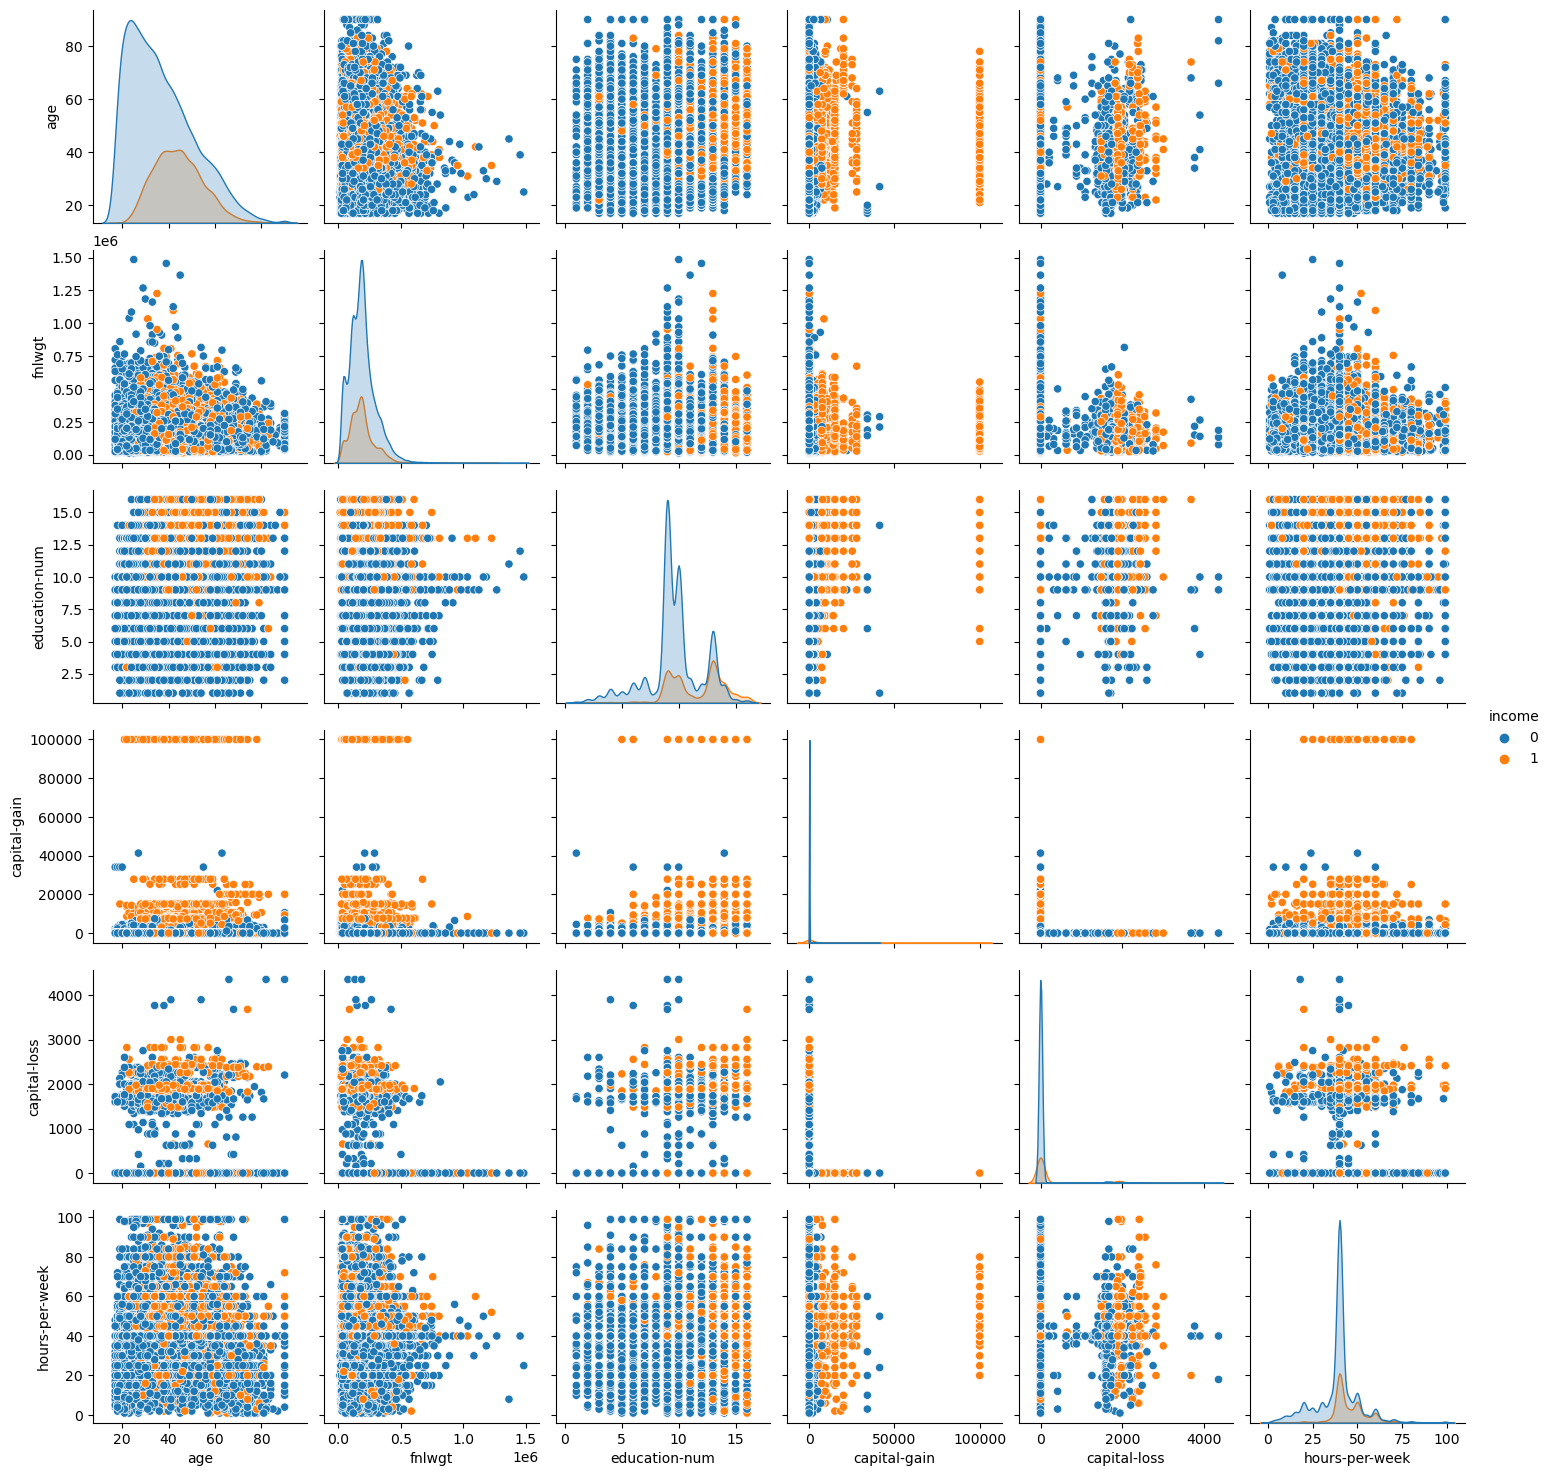

In [25]:
#pairplot shows graphical representation of all numerical features with one another with target variable in legend
sns.pairplot(data=df,hue='income');

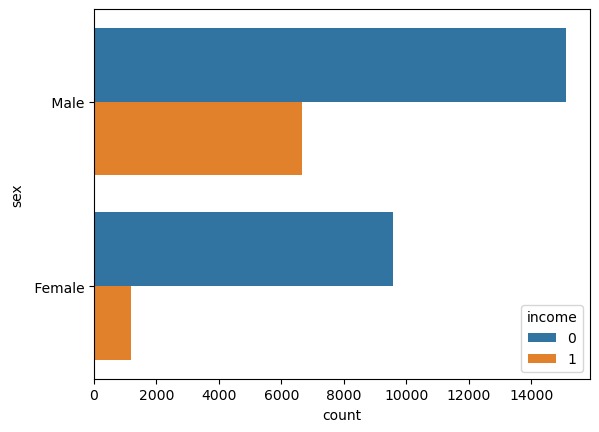

In [26]:
#countplot of sex of employees with legend
sns.countplot(y=df['sex'],hue=df['income']);

Observation:from above plot, we can say that male are earning more than female

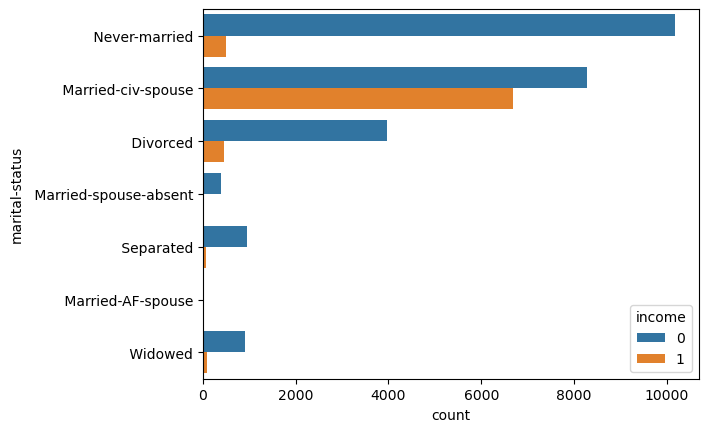

In [27]:
#countplot of marital Status of employees with legend
sns.countplot(y=df['marital-status'],hue=df['income']);

Observation:people belonging to 'never married' status, are earning more than that of people belonging to other marital status

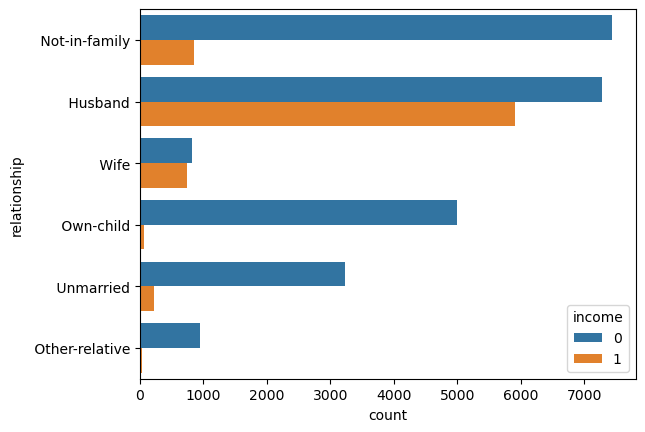

In [28]:
#countplot of relationship of employees with legend
sns.countplot(y=df['relationship'],hue=df['income']);

Observation:people belonging to 'Not-in-family' and 'Husband' status, are earning more than that of people belonging to other relationship status.

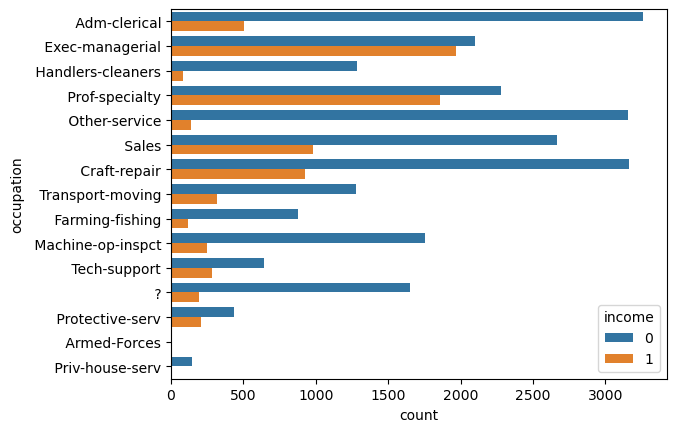

In [29]:
#countplot of occupation of employees with legend
sns.countplot(y=df['occupation'],hue=df['income']);

Observation:people belonging to 'Adm-clerical' occupation, are earning more than that of people belonging to other occupations.

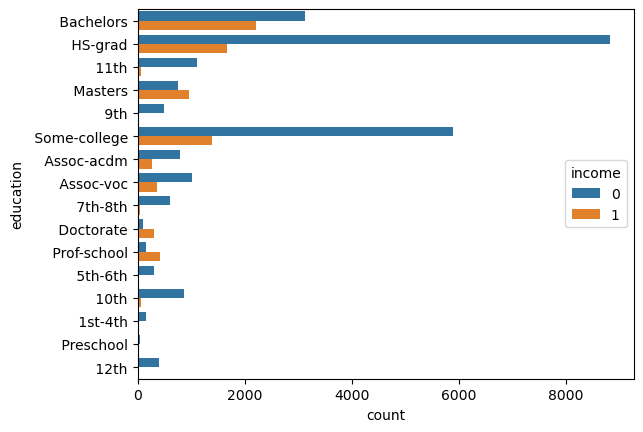

In [30]:
#countplot of education of employees with legend
sns.countplot(y=df['education'],hue=df['income']);

Observation:people belonging to 'HS-grad' status, are earning more than that of people belonging to other education qualification

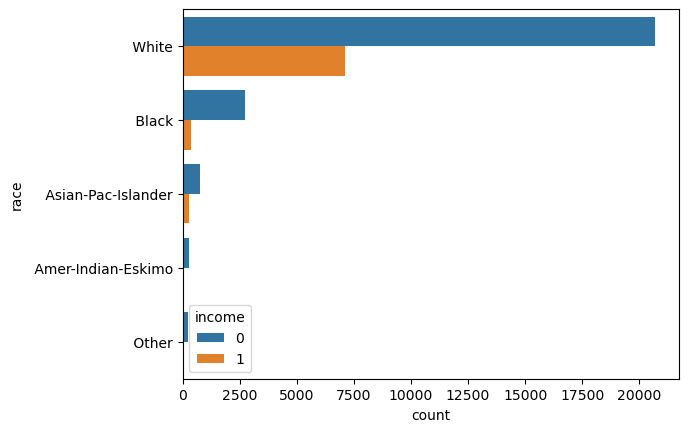

In [31]:
#countplot of race of employees with legend
sns.countplot(y=df['race'],hue=df['income']);

Observation:people belonging to 'white' race, are earning more than that of people belonging to other races

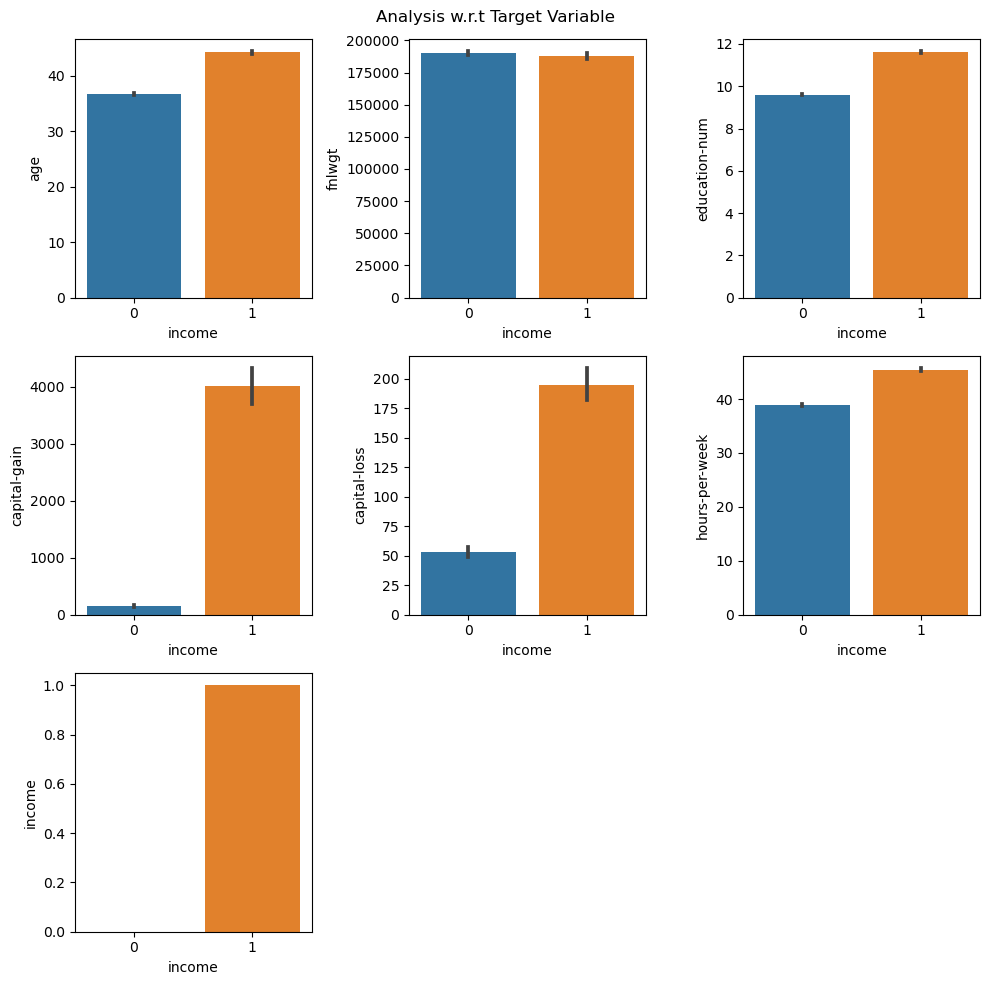

In [32]:
#Bivariate analysis of numerical features w.r.t Target Variable
plt.figure(figsize=(10,10))
plt.suptitle('Analysis w.r.t Target Variable')
for a in range(0,len(num_feat)):
    plt.subplot(3,3,a+1)
    sns.barplot(x='income',y=num_feat[a],data=df)
    plt.tight_layout()

Observations:
The bar plot above are bivariate plots.
In terms of Age, older the person, more is the probability of income getting higher.
Capital gain, and capital loss are more experienced by people having higher income.

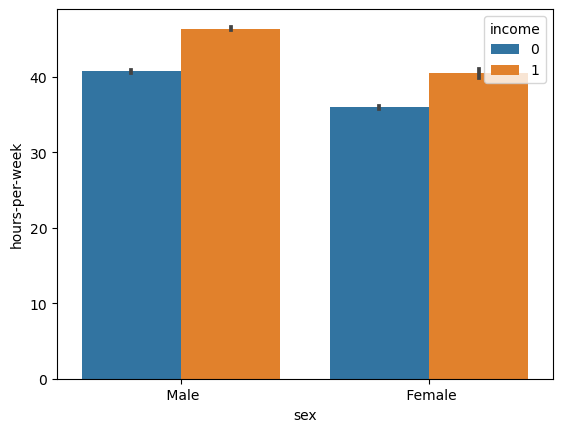

In [33]:
#barplot of sex with legend of Target Variable
sns.barplot(x=df['sex'],y=df['hours-per-week'],hue=df['income'],data=df);

Observations:male works more hours than female

# Checking for Special Symbol

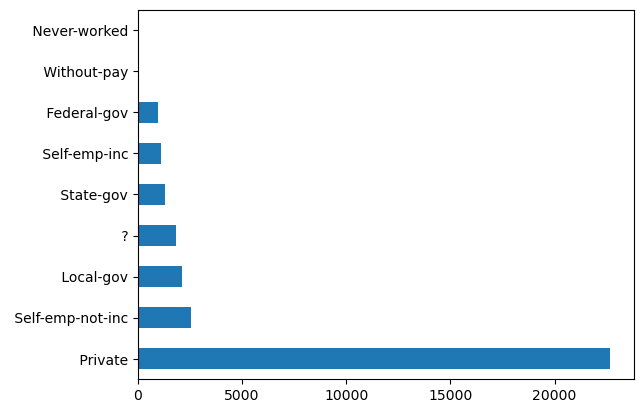

In [34]:
df['workclass'].value_counts().plot(kind='barh');

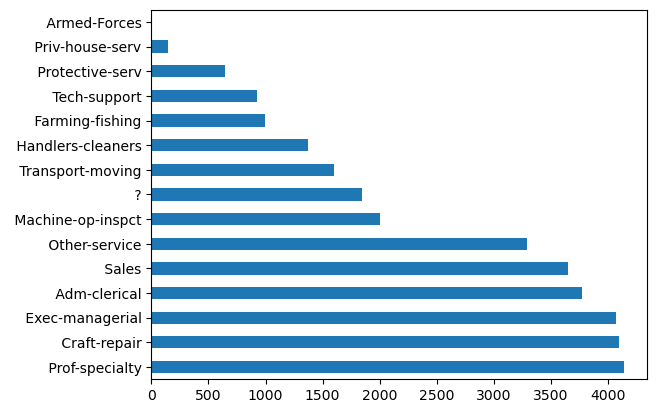

In [35]:
df['occupation'].value_counts().plot(kind='barh');

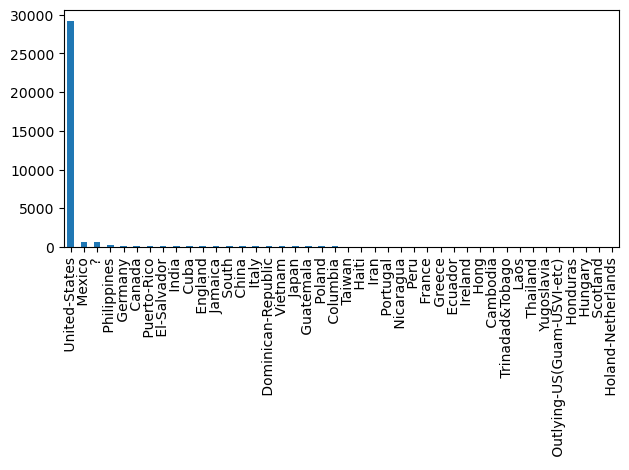

In [36]:
df['native-country'].value_counts().plot(kind='bar')
plt.tight_layout();

Observations: ' ?' symbon in workclass, occupation and native-country are most possibly NaN values

# Replacing the Special Symbol

In [37]:
df.replace(' ?',np.NAN,inplace=True)

In [38]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64

In [39]:
for col in ['workclass','occupation','native-country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

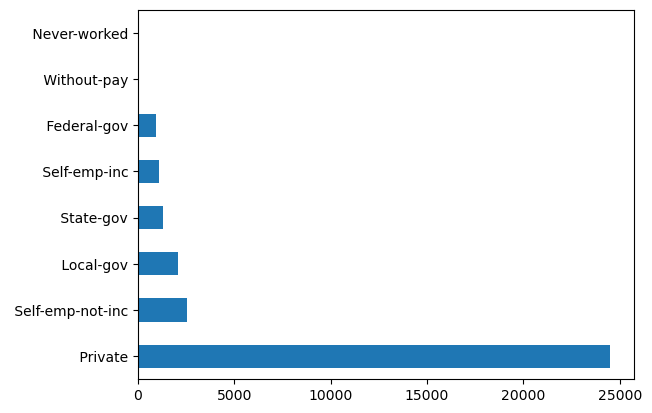

In [40]:
df['workclass'].value_counts().plot(kind='barh');

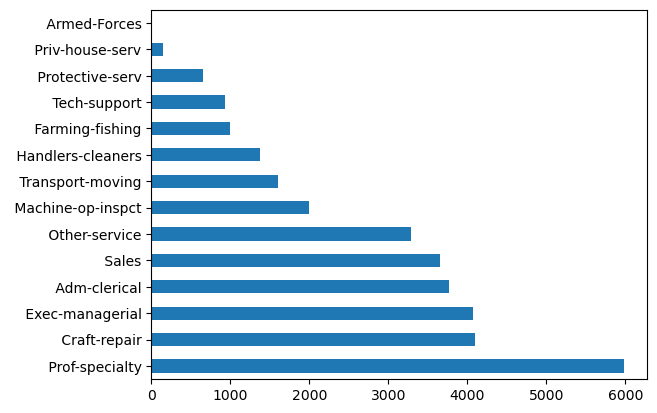

In [41]:
df['occupation'].value_counts().plot(kind='barh');

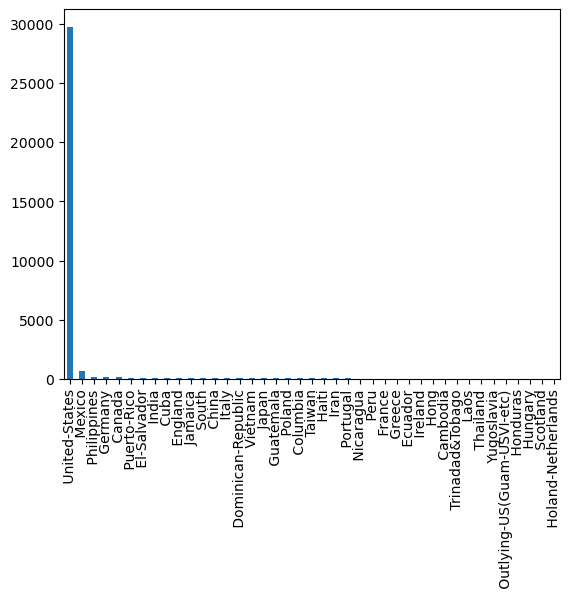

In [42]:
df['native-country'].value_counts().plot(kind='bar');

Observations: NaN values are replaced and we can see in above three plot the value is increased as compared to the previous plots

In [43]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


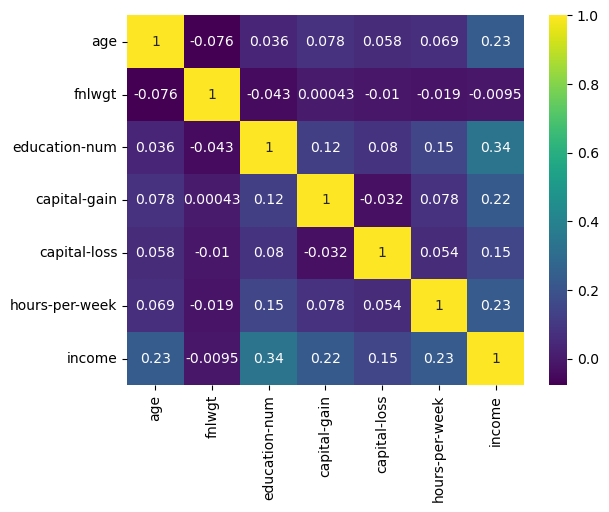

In [44]:
sns.heatmap(data=df.corr(),annot=True,cmap='viridis');

Observations:there is very less correlation between features, which shows the there is no to multicollinearity and fnlwgt has lowest correlation with rest of featurees; the highest correlation is in between eduaction and income.

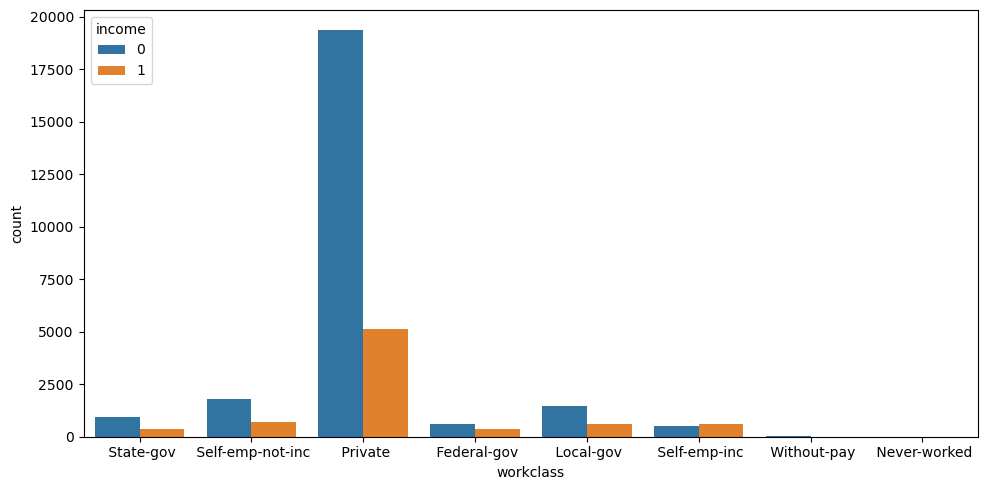

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['workclass'],hue=df['income'])
plt.tight_layout();

Observations:employees in 'Private' workclass get paid the most and within those, most of them falls in <=50K pay scale

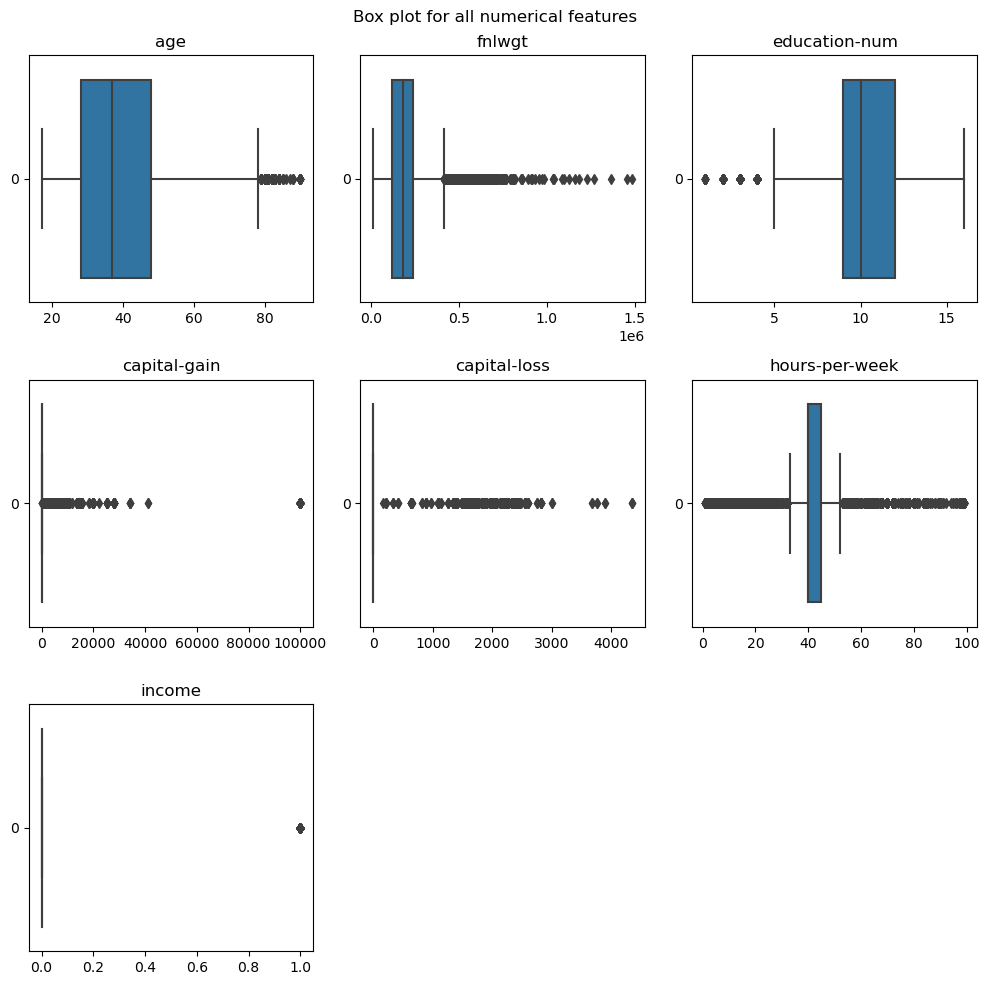

In [46]:
#Bivariate analysis of numerical features w.r.t Target Variable
plt.figure(figsize=(10,10))
plt.suptitle('Box plot for all numerical features')
for a in range(0,len(num_feat)):
    plt.subplot(3,3,a+1)
    sns.boxplot(data=df[num_feat[a]],orient='h')
    plt.title(label=num_feat[a])
    plt.tight_layout()

# Handeling Outliers

In [47]:
#deriving upperlimit and lowerlimit for 'fnlwgt'
IQR= df['fnlwgt'].quantile(0.75)-df['fnlwgt'].quantile(0.25)
Lower=df['fnlwgt'].quantile(0.25)-1.5*IQR
Upper=df['fnlwgt'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower)
print('Upper_limit:',Upper)

Lower_limt: -60922.0
Upper_limit: 415742.0


In [48]:
#getting rid of outliers
df['fnlwgt']=np.where(df['fnlwgt']>Upper,Upper,np.where(df['fnlwgt']<Lower,Lower,df['fnlwgt']))

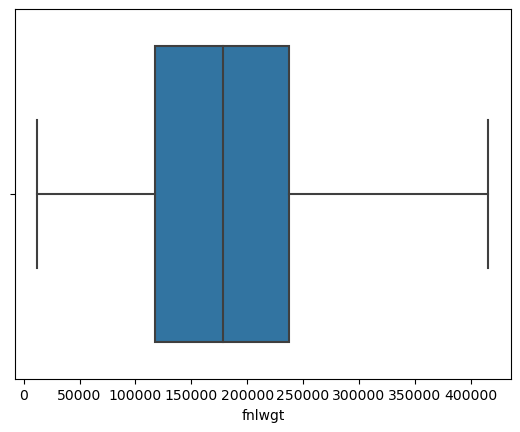

In [49]:
#boxplot must not show outliers now
sns.boxplot(x='fnlwgt', data=df);

In [50]:
#deriving upperlimit and lowerlimit for 'age'
IQR= df['age'].quantile(0.75)-df['age'].quantile(0.25)
Lower=df['age'].quantile(0.25)-1.5*IQR
Upper=df['age'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower)
print('Upper_limit:',Upper)

Lower_limt: -2.0
Upper_limit: 78.0


In [51]:
#getting rid of outliers
df['age']=np.where(df['age']>Upper,Upper,np.where(df['age']<Lower,Lower,df['age']))

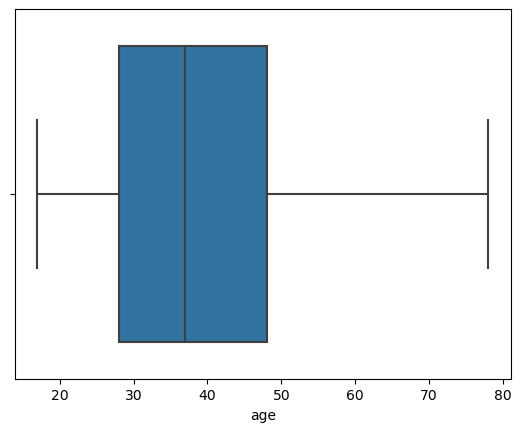

In [52]:
#boxplot must not show outliers now
sns.boxplot(x='age', data=df);

In [53]:
#deriving upperlimit and lowerlimit for 'hours-per-week'
IQR= df['hours-per-week'].quantile(0.75)-df['hours-per-week'].quantile(0.25)
Lower=df['hours-per-week'].quantile(0.25)-1.5*IQR
Upper=df['hours-per-week'].quantile(0.75)+1.5*IQR
print('Lower_limt:',Lower)
print('Upper_limit:',Upper)

Lower_limt: 32.5
Upper_limit: 52.5


In [54]:
#getting rid of outliers
df['hours-per-week']=np.where(df['hours-per-week']>Upper,Upper,np.where(df['hours-per-week']<Lower,Lower,df['hours-per-week']))

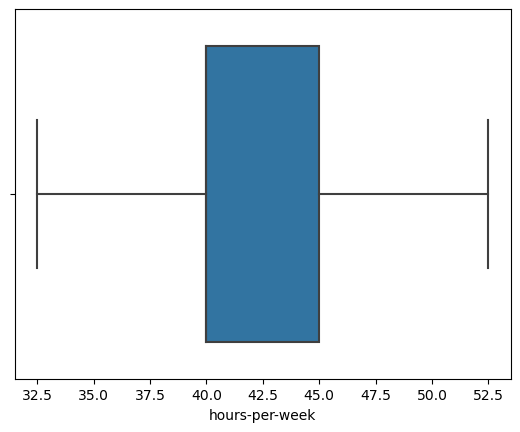

In [55]:
#boxplot must not show outliers now
sns.boxplot(x='hours-per-week', data=df);

# Separating target variable(Dependent) from Indeendent variables

In [56]:
x=df.iloc[:,:-1]
y=df['income']

In [57]:
# We have Imbalanced Data and we have to do sampling to avoid this problem
# we have two method so for 1] Under Sampling, 2] Oversampling
# We will go for Oversampling.
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_sample,y_sample=ros.fit_resample(x,y)

In [58]:
#checking our independent variable data
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba


In [59]:
#checking oit dependent variable data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

# Label encoding on the categorical features

In [60]:
#Feature Engineering
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

In [61]:
#fit and transform
x[cat_feat]=x[cat_feat].apply(LabelEncoder().fit_transform)

In [62]:
#checking independent variable data
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6,77516.0,9,13,4,0,1,4,1,2174,0,40.0,38
1,50.0,5,83311.0,9,13,2,3,0,4,1,0,0,32.5,38
2,38.0,3,215646.0,11,9,0,5,1,4,1,0,0,40.0,38
3,53.0,3,234721.0,1,7,2,5,0,2,1,0,0,40.0,38
4,28.0,3,338409.0,9,13,2,9,5,2,0,0,0,40.0,4


In [63]:
#checking target variable data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [64]:
#Hyperparameter Tuning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=10)   

In [65]:
#getting shape of training data of independent variables
x_train.shape

(21799, 14)

In [66]:
#getting shape of training data of target variable
y_train.shape

(21799,)

In [67]:
#getting shape of testing data of independent variables
x_test.shape

(10738, 14)

In [68]:
#getting shape of testing data of target variable
y_test.shape

(10738,)

# Decision Tree Classifier

In [69]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [70]:
#fitting the model
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
#learning the scores
DT.score(x_test,y_test)

0.8097411063512758

In [72]:
#predecting target variable
DTpred=DT.predict(x_test)

In [73]:
#Model Evaluation
from sklearn.metrics import accuracy_score
DTacc=accuracy_score(y_test,DTpred)
report=[]
report.append(['Decision Tree', DTacc])
DTacc

0.8097411063512758

# Hyperparameter Tuning

In [74]:
#Hyper-Tuning 
from sklearn.model_selection import GridSearchCV
grid_parameter={
    'criterion':['gini', 'entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
    }

In [75]:
DTgrid=GridSearchCV(estimator=DT, param_grid=grid_parameter, cv=3, n_jobs=-1)

In [76]:
DTgrid.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [77]:
DTgrid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'best'}

In [78]:
DTbest_para=DecisionTreeClassifier(criterion = "gini", max_depth= 8 , min_samples_leaf= 9, min_samples_split= 2 , 
                                      splitter= "best")

In [79]:
DTbest_para.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=9)

In [80]:
DTbest_para_pred2 = DTbest_para.predict(x_test)

In [81]:
print("Accuracy Before Hyper-parameter tunning:",accuracy_score(y_test,DTpred))
print("Accuracy after Hyper-parameter tunning:",accuracy_score(y_test,DTbest_para_pred2))

Accuracy Before Hyper-parameter tunning: 0.8097411063512758
Accuracy after Hyper-parameter tunning: 0.8573291115663997


In [82]:
import pickle
filename='income_pred_model'
pickle.dump(DT, open(filename,'wb'))

In [83]:
loaded_model=pickle.load(open(filename,'rb'))

In [84]:
loaded_model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [85]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,United-States,0
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,32.5,United-States,0
2,38.0,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,0
3,53.0,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,0
4,28.0,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,0
32557,40.0,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,1
32558,58.0,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,0
32559,22.0,Private,201490.0,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,32.5,United-States,0


In [86]:
x

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39.0,6,77516.0,9,13,4,0,1,4,1,2174,0,40.0,38
1,50.0,5,83311.0,9,13,2,3,0,4,1,0,0,32.5,38
2,38.0,3,215646.0,11,9,0,5,1,4,1,0,0,40.0,38
3,53.0,3,234721.0,1,7,2,5,0,2,1,0,0,40.0,38
4,28.0,3,338409.0,9,13,2,9,5,2,0,0,0,40.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,257302.0,7,12,2,12,5,4,0,0,0,38.0,38
32557,40.0,3,154374.0,11,9,2,6,0,4,1,0,0,40.0,38
32558,58.0,3,151910.0,11,9,6,0,4,4,0,0,0,40.0,38
32559,22.0,3,201490.0,11,9,4,0,3,4,1,0,0,32.5,38
